In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
dataset.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4]:
dataset.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
date_time = datetime.datetime.now()

In [6]:
dataset['Age']=date_time.year - dataset['Year']

In [7]:
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


dataset.drop('Year',axis=1,inplace=True)

In [8]:
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [9]:
dataset = dataset.iloc[:, 1:]

In [10]:
#Removing km/pl and converting to numeric
Mileage_train=dataset["Mileage"].str.split(" ", expand = True)
dataset["Mileage"] = pd.to_numeric(Mileage_train[0], errors = 'coerce')


In [11]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [12]:
Engine_train=dataset["Engine"].str.split(" ", expand = True)
dataset["Engine"] = pd.to_numeric(Engine_train[0], errors = 'coerce')


In [13]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74,11


In [14]:
Power_train=dataset["Power"].str.split(" ", expand = True)
dataset["Power"] = pd.to_numeric(Power_train[0], errors = 'coerce')


In [15]:
make_train = dataset["Name"].str.split(" ", expand = True)
dataset["Manufacturer"] = make_train[0]


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot = sns.countplot(x='Manufacturer', data=X_train)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                  (p.get_x() + p.get_width() / 2.0, p.get_height()), 
                  ha='center', 
                  va='center', 
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.show()


NameError: name 'X_train' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age,Manufacturer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,14,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,9,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,13,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,12,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,11,Audi


In [ ]:
dataset.drop('Name',axis=1,inplace=True)

In [ ]:
dataset.drop('New_Price',axis=1,inplace=True)

In [ ]:
dataset.drop('Location',axis=1,inplace=True)


In [ ]:
dataset.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Manufacturer
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,14,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi


In [ ]:
dataset.shape

(6019, 12)

In [ ]:
dataset['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
dataset['Fuel_Type'] = dataset['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})

In [ ]:
dataset['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
dataset['Owner_Type'] = dataset['Owner_Type'].map({'First':0,'Second':1,'Third':2,'Fourth & Above':3})

In [ ]:
dataset['Transmission'].unique()
dataset['Transmission'] =dataset['Transmission'].map({'Manual':0,'Automatic':1})


In [ ]:
dataset.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Manufacturer
0,2010,72000,2,0,0,26.60,998.0,58.16,5.0,1.75,14,Maruti
1,2015,41000,1,0,0,19.67,1582.0,126.20,5.0,12.50,9,Hyundai
2,2011,46000,0,0,0,18.20,1199.0,88.70,5.0,4.50,13,Honda
3,2012,87000,1,0,0,20.77,1248.0,88.76,7.0,6.00,12,Maruti
4,2013,40670,1,1,1,15.20,1968.0,140.80,5.0,17.74,11,Audi


In [ ]:
dataset.isnull().sum()

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Age                    0
Manufacturer           0
dtype: int64

In [ ]:
X = dataset.drop(['Manufacturer','Price'],axis=1)
y = dataset['Price']

In [ ]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [ ]:
dataset["Engine"].fillna(dataset["Engine"].astype("float64").mean(), inplace = True)


dataset["Power"].fillna(dataset["Power"].astype("float64").mean(), inplace = True)


dataset["Seats"].fillna(dataset["Seats"].astype("float64").mean(), inplace = True)



In [ ]:
dataset.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Age                  0
Manufacturer         0
dtype: int64

In [ ]:
dataset["Mileage"].fillna(dataset["Mileage"].astype("float64").mean(), inplace = True)


In [ ]:
dataset.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age                  0
Manufacturer         0
dtype: int64

In [ ]:
dataset.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,0.557402,0.285762,0.202858,18.134961,1621.276450,113.253050,5.278735,9.479468,10.641801
std,3.269742,9.126884e+04,0.528503,0.451814,0.456356,4.581528,599.553865,53.231019,0.806012,11.187917,3.269742
min,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,0.000000,0.440000,5.000000
25%,2011.000000,3.400000e+04,0.000000,0.000000,0.000000,15.170000,1198.000000,78.000000,5.000000,3.500000,8.000000
50%,2014.000000,5.300000e+04,1.000000,0.000000,0.000000,18.150000,1493.000000,98.600000,5.000000,5.640000,10.000000
75%,2016.000000,7.300000e+04,1.000000,1.000000,0.000000,21.100000,1969.000000,138.030000,5.000000,9.950000,13.000000
max,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000,26.000000


<Figure size 2000x2000 with 0 Axes>

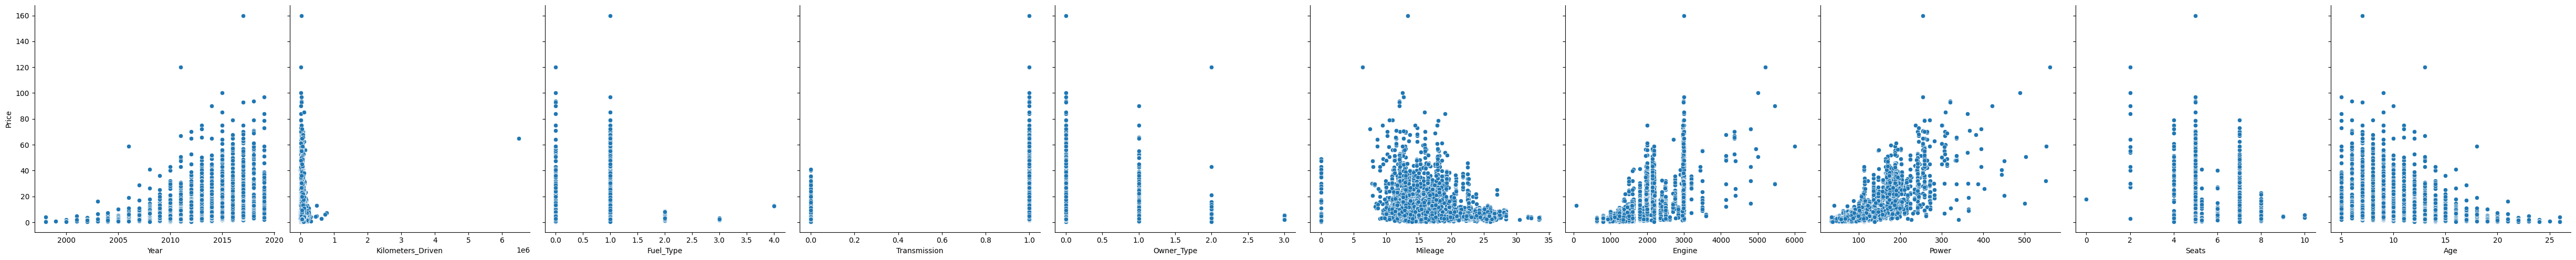

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=dataset, x_vars=[    'Year',
    'Kilometers_Driven',
    'Fuel_Type',
    'Transmission',
    'Owner_Type',
    'Mileage',
    'Engine',
    'Power',
    'Seats',
    'Age'], 
             y_vars=['Price'], kind='scatter', height=5)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [ ]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
score = metrics.r2_score(y_test,y_pred)


In [ ]:
print(score)

0.8889336592059636


In [ ]:
xg = XGBRegressor()
xg_final = xg.fit(X,y)

In [ ]:
import joblib
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [ ]:
model = joblib.load('car_price_predictor')

In [ ]:
import pandas as pd
data_new = pd.DataFrame({
    'Year':2010,
    'Kilometers_Driven':76155,
    'Fuel_Type':0,
    'Transmission':0,
    'Owner_Type':0,
    'Mileage':18.60,
    'Engine':1199,
    'Power':79.40,
    'Seats':5.0,
    'Age':13
},index=[0])

In [ ]:
model.predict(data_new)

array([2.204929], dtype=float32)